# Problem Statement 
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# Table of Contents:
1. [Package installation and importing](#1.-Install-and-import-the-packages)
2. [Load the data and check essential properties](#2.-Load-the-data-and-check-the-null-values,-look-for-the-data)
3. [Data Cleaning](#3.-Data-Cleaning)
    1. [Drop the columns having all null values](#Drop-the-columns-having-all-null-values)
    2. [Drop the columns having more than 60% null values](#Drop-the-columns-having-more-than-60%-null-values)
    3. [Drop the columns having no use in analysis](#Drop-the-following-columns,-Because-We-can-not-drive-any-inferences-from-these)
    4. [Drop the columns with Same min and max value](#Drop-columns-having-same-min-and-max-value)
    5. [Drop the columns with distinct values](#Drop-the-columns-with-distinct-values)
    6. [Drop the columns having single value](#Drop-the-columns-having-only-single-values)
4. [DataTransformation](#4.-Data-Transformation)
    1. [Fill missing values for employee length](#Fill-missing-values-for-employee-length)
    2. [Correct wrongly identified data points](#Correct-wrongly-identified-data-points)
5. [Univariate Analysis](#5.-Univariate-Analysis)
    1. [Explore loan status](#Explore-loan-status)
    2. [Explore all the object and numeric data points](#Explore-all-the-object-and-numeric-data-points)
6. [Bivariate Analysis](#6.-Bivariate-Analysis)
    1. [Impact of Zipcode on loan default](#Impact-of-Zipcode-on-loan-default)
    3. [Impact of loan purpose on loan default](#Impact-of-loan-purpose-on-loan-default)
    4. [Impact of loan title on loan default](#Impact-of-loan-title-on-loan-default)
    5. [Impact of Loan Issue date on loan default](#Impact-of-Loan-Issue-date-on-loan-default)
    6. [Impact of Lending Club grades on loan default](#Impact-of-Lending-Club-grades-on-loan-default)
    7. [Impact of Borrower's home_ownership on loan default](#Impact-of-Borrower's-home_ownership-on-loan-default)
    8. [Impact of Borrower's varification status on loan default](#Impact-of-Borrower's-varification-status-on-loan-default)
    9. [Impact of Borrower's employer on loan default](#Impact-of-Borrower's-employer-on-loan-default)
    10. [Impact of employment length on Loan Status](#Impact-of-employment-length-on-Loan-Status)
    11. [Impact of employment length on Loan Status based on %](#Impact-of-employment-length-on-Loan-Status-based-on-%)
    12. [Impact of loan default on income range](#Impact-of-loan-default-on-income-range)
    13. [Impact of loan default on Funded Amount range](#Impact-of-loan-default-on-Funded-Amount-range)
7. [Multivariate Analysis](#7.-Multivariate-Analysis)
    1. [Default Rate by Income Range and Funded Amount Range](#Impact-of-loan-default-on-Funded-Amount-range)
    2. [Default Rate by Interest Range and term](#Impact-of-loan-default-on-Funded-Amount-range)
    3. [Default Rate by Installment and Bankruptcy Ranges](#Default-Rate-by-Installment-and-Bankruptcy-Ranges)
    4. [Default Rate by Installment and Income Ranges](#Default-Rate-by-Installment-and-Income-Ranges)
    5. [Default Rate by DTI Range and Open Account Range](#Default-Rate-by-DTI-Range-and-Open-Account-Range)

## 1.  Install and import the packages


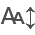

In [2]:
# !pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

## 2. Load the data and check the null values, look for the data  

In [3]:
rawData = pd.read_csv("loan.csv", low_memory=False)
print(rawData.shape)

(39717, 111)


In [4]:
rawData.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## 3. Data Cleaning 

In [5]:
rawData.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

### Drop the columns having all null values 

In [6]:
rawData = rawData.loc[:,rawData.isnull().sum()!=39717]
print(rawData.shape)

(39717, 57)


### Drop the columns having more than 60% null values

- We can not drive anything from these data points

In [7]:
rawData = rawData.loc[:,rawData.isnull().mean() * 100 < 60]
print(rawData.shape)

(39717, 54)


### Drop the following columns, Because We can not drive any inferences from these  
- id 
- member id
- url
- desc

In [8]:
rawData= rawData.drop(columns=['id','member_id','url','desc'])
print(rawData.shape)

(39717, 50)


### Drop columns having same min and max value

In [9]:
# Get the columns where min and max values are equal
constant_columns = rawData.describe().loc['min'] == rawData.describe().loc['max']

# Filter out these columns
constant_columns = constant_columns[constant_columns].index.tolist()

print(constant_columns)
rawData= rawData.drop(columns=constant_columns)
print(rawData.shape)

['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
(39717, 44)


### Drop the columns with distinct values
- There are no columns with distinct values

In [10]:
distinct_columns = [col for col in rawData.columns if rawData[col].nunique() == len(rawData)]
print(distinct_columns)
rawData = rawData.drop(columns=distinct_columns)
print(rawData.shape)

[]
(39717, 44)


### Drop the columns having only single values

In [11]:
distinct_columns = [col for col in rawData.columns if rawData[col].nunique() == 1]
print(distinct_columns)
rawData = rawData.drop(columns=distinct_columns)
print(rawData.shape)

['pymnt_plan', 'initial_list_status', 'application_type']
(39717, 41)


## 4. Data Transformation 

In [12]:
rawData.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
pub_rec_bankruptcies       float64
dtype: object

### Fill missing values for employee length


In [13]:
print(rawData.emp_length.isnull().sum())

rawData['emp_length'] = rawData['emp_length'].astype(str)
rawData['emp_length'].value_counts()

1075


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
nan          1075
Name: count, dtype: int64

- There are 1075 null meaning these borrrowers are not salaried class, i.e. they are business class
- Convert emp_length to ordered catagorical varriable

In [14]:
# Ensure emp_length is treated correctly
rawData["emp_length"] = rawData["emp_length"].replace("", np.nan)  # Convert empty strings to NaN
print(rawData["emp_length"].value_counts(dropna=False))
# Fill NaN values with "Business Class"
rawData["emp_length"] = rawData["emp_length"].fillna("Business Class")

# Display value counts to verify missing values are handled
print(rawData["emp_length"].value_counts(dropna=False))

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
nan          1075
Name: count, dtype: int64
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
nan          1075
Name: count, dtype: int64


### Correct wrongly identified data points
1. int_rate  [Remove %]
3. revol_util [Remove %]

In [15]:
rawData['revol_util'] = rawData['revol_util'].astype(str)
print(rawData['revol_util'].value_counts())

revol_util
0%        977
0.20%      63
63%        62
0.10%      58
66.70%     58
         ... 
77.63%      1
25.74%      1
62.31%      1
0.83%       1
7.28%       1
Name: count, Length: 1090, dtype: int64


In [16]:
rawData['int_rate'] = rawData['int_rate'].astype(str)
print(rawData['int_rate'].value_counts())

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64


In [17]:
rawData.revol_util = rawData.revol_util.str.rstrip('%').astype(float)
rawData.int_rate = rawData.int_rate.str.rstrip('%').astype(float)

## 5. Univariate Analysis

### Explore loan status 

In [18]:
print(rawData.loan_status.dtype)
print(rawData.loan_status.describe().to_frame())
print("\nPrint the % for each loan status")
print(rawData.loan_status.value_counts().to_frame()/rawData.shape[0])
# create a derived column 
# Filter for defaults (e.g., "Charged Off")
rawData["is_default"] = rawData["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0)

object
       loan_status
count        39717
unique           3
top     Fully Paid
freq         32950

Print the % for each loan status
                count
loan_status          
Fully Paid   0.829620
Charged Off  0.141677
Current      0.028703


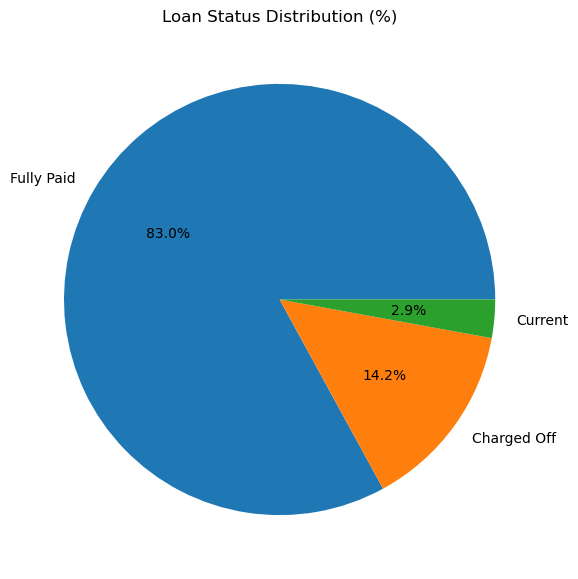

In [22]:
loan_status_percent = rawData["loan_status"].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(7, 7))
plt.pie(loan_status_percent, labels=loan_status_percent.index, autopct='%1.1f%%')
plt.title("Loan Status Distribution (%)")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\2846890130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette=["red", "green"])


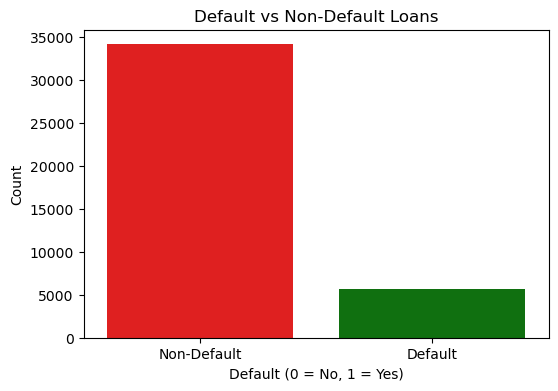

In [23]:
# Count of defaults vs. non-defaults
default_counts = rawData["is_default"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=default_counts.index, y=default_counts.values, palette=["red", "green"])
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Default vs Non-Default Loans")
plt.xticks(ticks=[0, 1], labels=["Non-Default", "Default"])
plt.show()

**82.9% of applicants has paid loan, 14.1% of the applicants has not paid the loans**

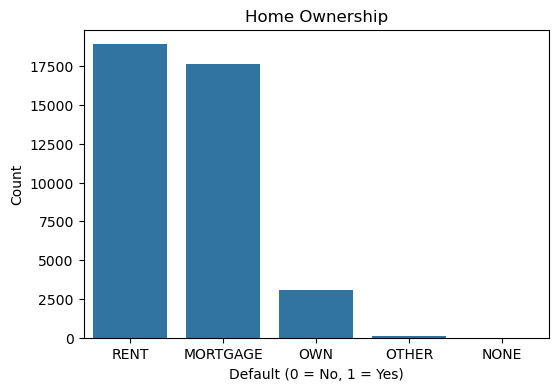

In [24]:
# Count of defaults vs. non-defaults
home_ownership = rawData["home_ownership"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=home_ownership.index, y=home_ownership.values)
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Home Ownership")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\3497140517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rawData, x="grade", order=sorted(rawData["grade"].unique()), palette="viridis")


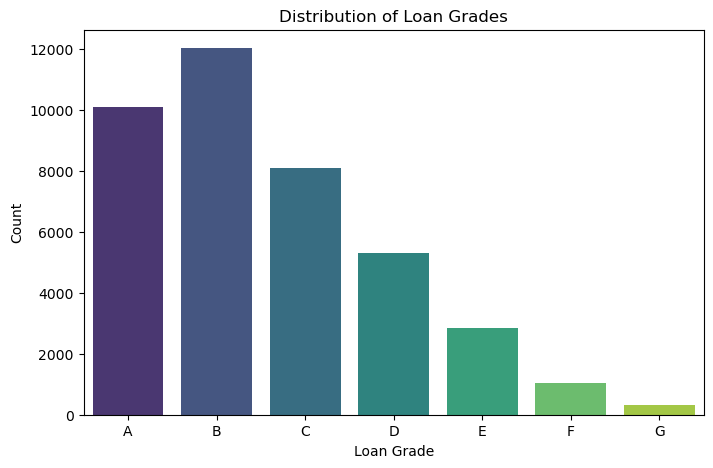

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rawData, x="grade", order=sorted(rawData["grade"].unique()), palette="viridis")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.title("Distribution of Loan Grades")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\1402223673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rawData, x="sub_grade", order=sorted(rawData["sub_grade"].unique()), palette="plasma")


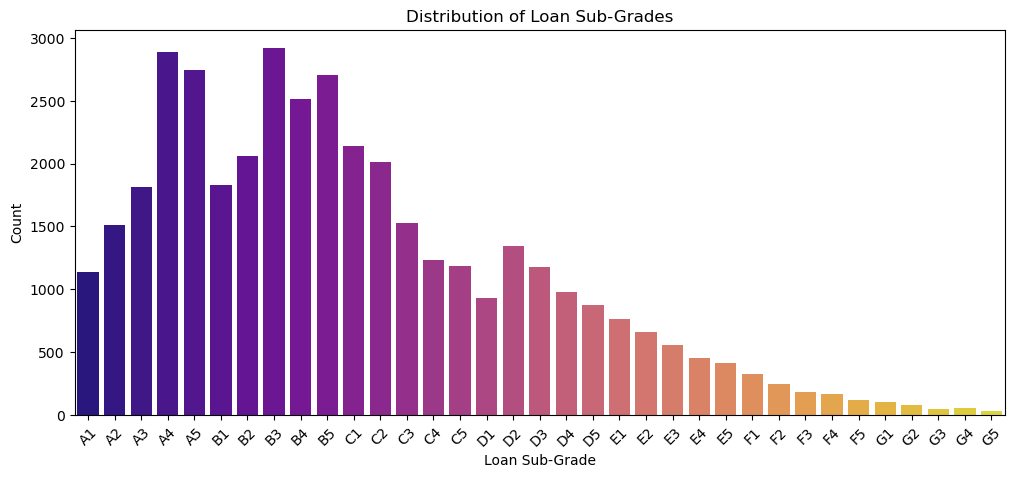

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(data=rawData, x="sub_grade", order=sorted(rawData["sub_grade"].unique()), palette="plasma")
plt.xlabel("Loan Sub-Grade")
plt.ylabel("Count")
plt.title("Distribution of Loan Sub-Grades")
plt.xticks(rotation=45)
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\488601396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rawData, x="grade", order=sorted(rawData["grade"].unique()), palette="viridis")


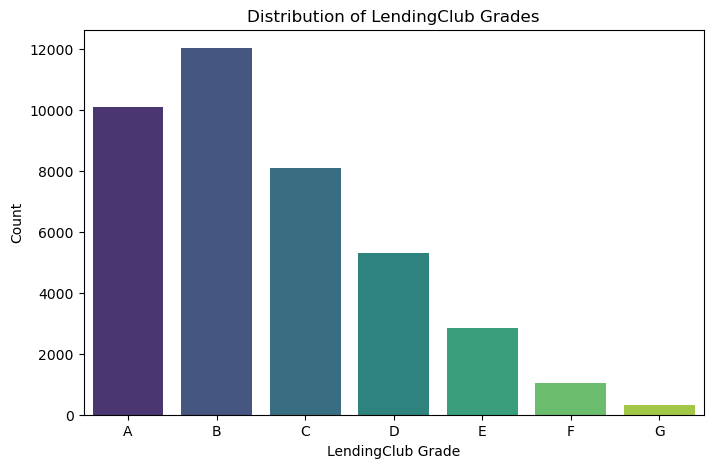

In [27]:
# Plot Grade Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=rawData, x="grade", order=sorted(rawData["grade"].unique()), palette="viridis")
plt.xlabel("LendingClub Grade")
plt.ylabel("Count")
plt.title("Distribution of LendingClub Grades")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\1430672646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rawData, x="emp_length", palette="viridis")


<Figure size 1000x500 with 0 Axes>

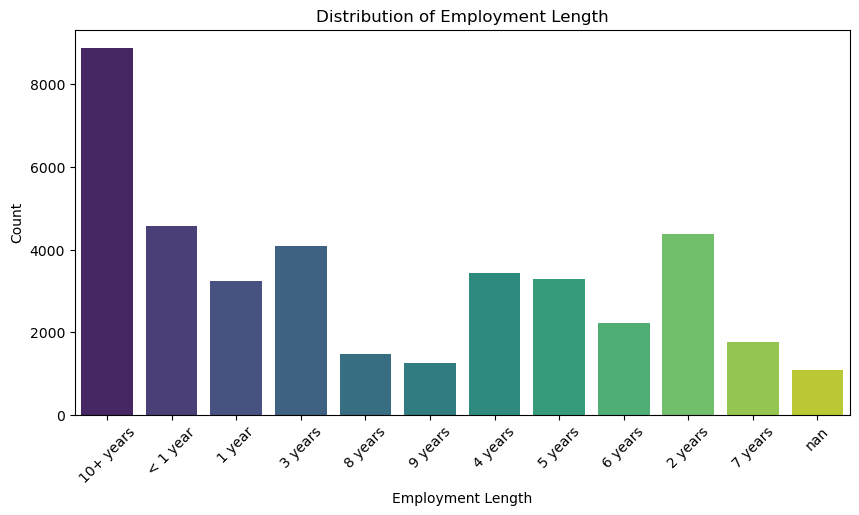

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=rawData, x="emp_length", palette="viridis")
plt.xlabel("Employment Length")
plt.ylabel("Count")
plt.title("Distribution of Employment Length")
plt.xticks(rotation=45)
plt.show()

### Explore all the object and numeric data points

In [241]:
print(rawData.columns[rawData.dtypes != object])
print(rawData.columns[rawData.dtypes == object])

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'is_default'],
      dtype='object')
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


In [242]:
rawData[rawData.columns[rawData.dtypes != object]].describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868     12.021177   
std     7456.670694   7187.238670      7128.450439      3.724825   
min      500.000000    500.000000         0.000000      5.420000   
25%     5500.000000   5400.000000      5000.000000      9.250000   
50%    10000.000000   9600.000000      8975.000000     11.860000   
75%    15000.000000  15000.000000     14400.000000     14.590000   
max    35000.000000  35000.000000     35000.000000     24.590000   

        installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000   
mean     324.561922  6.896893e+04     13.315130      0.146512        0.869200   
std      208.874874  6.379377e+04      6.678594      0.491812        1.070219   
min       15.690000  4.000000e+03      0.000000      0.000000        0.000000   
25%      167.020000  4.040400e+04      8.170000      0.000000        0.000000   
50%      280.220000  5.900000e+04     13.400000      0.000000        1.000000   
75%      430.780000  8.230000e+04     18.600000      0.000000        1.000000   
max     1305.190000  6.000000e+06     29.990000     11.000000        8.000000   

           open_acc  ...   total_pymnt  total_pymnt_inv  total_rec_prncp  \
count  39717.000000  ...  39717.000000     39717.000000     39717.000000   
mean       9.294408  ...  12153.596544     11567.149118      9793.348813   
std        4.400282  ...   9042.040766      8942.672613      7065.522127   
min        2.000000  ...      0.000000         0.000000         0.000000   
25%        6.000000  ...   5576.930000      5112.310000      4600.000000   
50%        9.000000  ...   9899.640319      9287.150000      8000.000000   
75%       12.000000  ...  16534.433040     15798.810000     13653.260000   
max       44.000000  ...  58563.679930     58563.680000     35000.020000   

       total_rec_int  total_rec_late_fee    recoveries  \
count   39717.000000        39717.000000  39717.000000   
mean     2263.663172            1.363015     95.221624   
std      2608.111964            7.289979    688.744771   
min         0.000000            0.000000      0.000000   
25%       662.180000            0.000000      0.000000   
50%      1348.910000            0.000000      0.000000   
75%      2833.400000            0.000000      0.000000   
max     23563.680000          180.200000  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  pub_rec_bankruptcies  \
count             39717.000000     39717.000000          39020.000000   
mean                 12.406112      2678.826162              0.043260   
std                 148.671593      4447.136012              0.204324   
min                   0.000000         0.000000              0.000000   
25%                   0.000000       218.680000              0.000000   
50%                   0.000000       546.140000              0.000000   
75%                   0.000000      3293.160000              0.000000   
max                7002.190000     36115.200000              2.000000   

         is_default  
count  39717.000000  
mean       0.141677  
std        0.348723  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 26 columns]

By understanding this data, we can make out that following varriables will not be useful for this case study 
1. last_pymnt_amnt
2. collection_recovery_fee
3. recoveries
4. total_rec_late_fee
5. total_rec_int
6. total_pymnt
7. total_pymnt_inv


In [243]:
rawData[rawData.columns[rawData.dtypes == object]].describe()

term  grade sub_grade emp_title emp_length home_ownership  \
count        39717  39717     39717     37258      39717          39717   
unique           2      7        35     28820         12              5   
top      36 months      B        B3   US Army  10+ years           RENT   
freq         29096  12020      2917       134       8879          18899   

       verification_status issue_d loan_status             purpose  \
count                39717   39717       39717               39717   
unique                   3      55           3                  14   
top           Not Verified  Dec-11  Fully Paid  debt_consolidation   
freq                 16921    2260       32950               18641   

                     title zip_code addr_state earliest_cr_line last_pymnt_d  \
count                39706    39717      39717            39717        39646   
unique               19615      823         50              526          101   
top     Debt Consolidation    100xx         CA           Nov-98       May-16   
freq                  2184      597       7099              370         1256   

       last_credit_pull_d  
count               39715  
unique                106  
top                May-16  
freq                10308

In [244]:
print(rawData.last_pymnt_d.isnull().sum())
print(rawData.last_pymnt_d.value_counts())

print(rawData.last_credit_pull_d.isnull().sum())
print(rawData.last_credit_pull_d.value_counts())

71
last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64
2
last_credit_pull_d
May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64


- Following varriable does not make any use for further analysis 
1. last_credit_pull_d
2. last_pymnt_d
3. earliest_cr_line

In [245]:
rawData= rawData.drop(columns=['last_credit_pull_d','last_pymnt_d','earliest_cr_line'])
rawData.shape

(39717, 39)

## 6. Bivariate Analysis 

### Impact of Zipcode on loan default

In [246]:
print(rawData.zip_code.isnull().sum())
print(rawData.zip_code.value_counts())

aggregated_data = rawData.groupby("zip_code").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

0
zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64


total_loans  default_loans  default_rate
zip_code                                          
007xx               1              0      0.000000
010xx             100             14     14.000000
011xx              14              1      7.142857
012xx              14              1      7.142857
013xx              14              3     21.428571
...               ...            ...           ...
995xx              33              5     15.151515
996xx              13              2     15.384615
997xx              21              6     28.571429
998xx              10              0      0.000000
999xx               1              1    100.000000

[823 rows x 3 columns]

Its difficult to conclude with zip code lets explore state 

In [30]:
print(rawData.addr_state.isnull().sum())
# print(rawData.addr_state.value_counts())

aggregated_data = rawData.groupby("addr_state").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

0


total_loans  default_loans  default_rate
addr_state                                          
AK                   80             15     18.750000
AL                  452             54     11.946903
AR                  245             27     11.020408
AZ                  879            123     13.993174
CA                 7099           1125     15.847302
CO                  792             98     12.373737
CT                  751             94     12.516644
DC                  214             15      7.009346
DE                  114             12     10.526316
FL                 2866            504     17.585485
GA                 1398            215     15.379113
HI                  174             28     16.091954
IA                    5              0      0.000000
ID                    6              1     16.666667
IL                 1525            197     12.918033
IN                    9              0      0.000000
KS                  271             31     11.439114
KY                  325             45     13.846154
LA                  436             53     12.155963
MA                 1340            159     11.865672
MD                 1049            162     15.443279
ME                    3              0      0.000000
MI                  720            103     14.305556
MN                  615             81     13.170732
MO                  686            114     16.618076
MS                   19              2     10.526316
MT                   85             11     12.941176
NC                  788            114     14.467005
NE                    5              3     60.000000
NH                  171             25     14.619883
NJ                 1850            278     15.027027
NM                  189             30     15.873016
NV                  497            108     21.730382
NY                 3812            495     12.985310
OH                 1223            155     12.673753
OK                  299             40     13.377926
OR                  451             71     15.742794
PA                 1517            180     11.865524
RI                  198             25     12.626263
SC                  472             66     13.983051
SD                   64             12     18.750000
TN                   17              2     11.764706
TX                 2727            316     11.587825
UT                  258             40     15.503876
VA                 1407            177     12.579957
VT                   54              6     11.111111
WA                  840            127     15.119048
WI                  460             63     13.695652
WV                  177             21     11.864407
WY                   83              4      4.819277

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\868852312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")


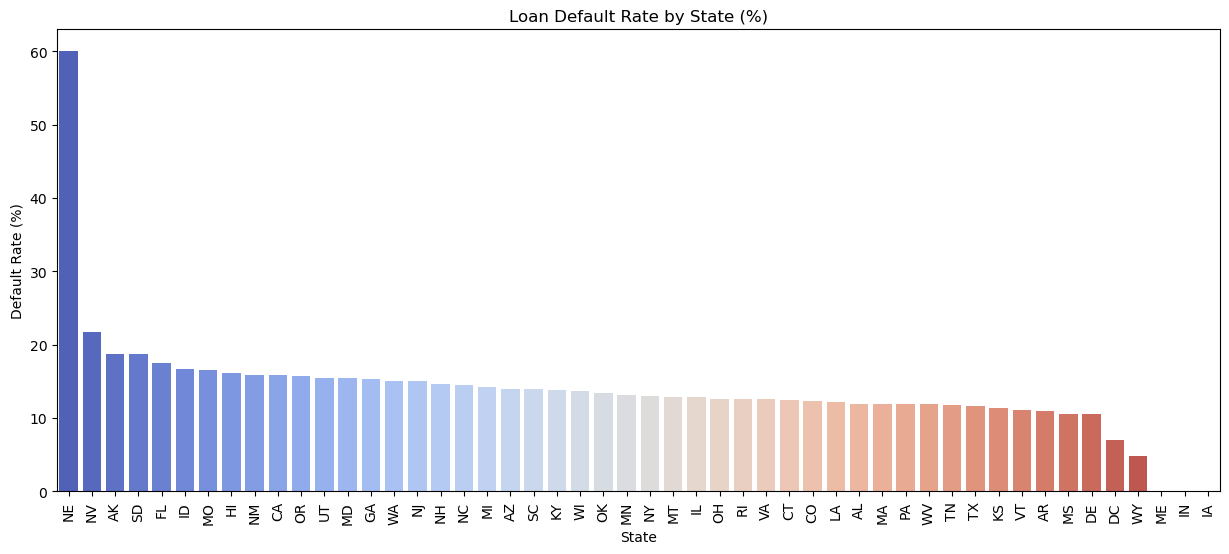

In [31]:
# Sort states by default rate
aggregated_data_sorted = aggregated_data.sort_values(by="default_rate", ascending=False)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")
plt.xlabel("State")
plt.ylabel("Default Rate (%)")
plt.title("Loan Default Rate by State (%)")
plt.xticks(rotation=90)
plt.show()

- a few states shows the higher default rate compare to others, but its not strong parameter for default

### Impact of loan purpose on loan default 

In [34]:
print(rawData.purpose.isnull().sum())
print(rawData.purpose.value_counts())

aggregated_data = rawData.groupby("purpose").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

0
purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64


total_loans  default_loans  default_rate
purpose                                                     
car                        1549            160     10.329245
credit_card                5130            542     10.565302
debt_consolidation        18641           2767     14.843624
educational                 325             56     17.230769
home_improvement           2976            347     11.659946
house                       381             59     15.485564
major_purchase             2187            222     10.150892
medical                     693            106     15.295815
moving                      583             92     15.780446
other                      3993            633     15.852742
renewable_energy            103             19     18.446602
small_business             1828            475     25.984683
vacation                    381             53     13.910761
wedding                     947             96     10.137276

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\1843468467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")


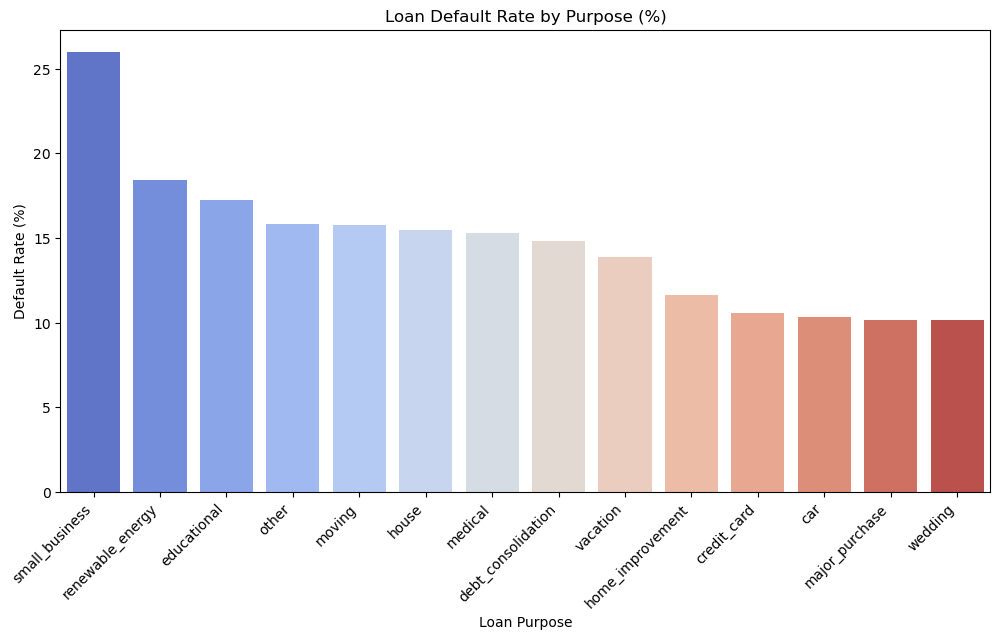

In [35]:

# Sort loan purposes by default rate
aggregated_data_sorted = aggregated_data.sort_values(by="default_rate", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")
plt.xlabel("Loan Purpose")
plt.ylabel("Default Rate (%)")
plt.title("Loan Default Rate by Purpose (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

- You can see loan taken for business have highest default, lower being with car loan 

### Impact of loan title on loan default 

In [249]:
print(rawData.title.isnull().sum())
print(rawData.title.value_counts())

aggregated_data = rawData.groupby("title").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

11
title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64


total_loans  default_loans  default_rate
title                                                              
\tdebt_consolidation                 2              0           0.0
   HITEK  EQUIPMENT                  1              1         100.0
 APRILIA TUONO 1000R                 1              0           0.0
 Auto                                1              0           0.0
 Auto Loan                           1              0           0.0
...                                ...            ...           ...
zack                                 2              0           0.0
zandercade                           1              0           0.0
zipcar                               1              0           0.0
zxcvb                                1              0           0.0
îîMY FIRST CAR îî            1              0           0.0

[19615 rows x 3 columns]

- Loan title does not make any sense


### Impact of Loan Issue date on loan default

In [250]:
print(rawData.issue_d.isnull().sum())
# Convert 'issue_d' to datetime format (if it's not already)
rawData['issue_d'] = pd.to_datetime(rawData['issue_d'], format='%b-%y') 

# Extract the year from the 'issue_d' column
rawData['issue_d_year'] = rawData['issue_d'].dt.year
rawData['issue_d_month'] = rawData['issue_d'].dt.month


aggregated_data = rawData.groupby("issue_d_year").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

0


total_loans  default_loans  default_rate
issue_d_year                                          
2007                  251             45     17.928287
2008                 1562            247     15.813060
2009                 4716            594     12.595420
2010                11532           1485     12.877211
2011                21656           3256     15.035094

We can conclude that neither year or month of issue has any impact on loan default 

### Impact of Lending Club grades on loan default

In [36]:
print(rawData.grade.value_counts())
print(rawData.grade.isnull().sum())
aggregated_data = rawData.groupby("grade").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64
0


total_loans  default_loans  default_rate
grade                                          
A            10085            602      5.969261
B            12020           1425     11.855241
C             8098           1347     16.633737
D             5307           1118     21.066516
E             2842            715     25.158339
F             1049            319     30.409914
G              316            101     31.962025

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\456543383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")


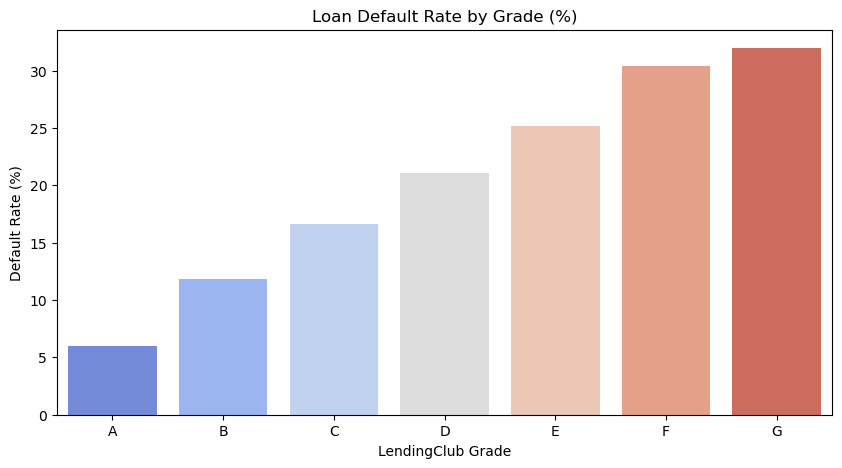

In [37]:
aggregated_data_sorted = aggregated_data.sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")
plt.xlabel("LendingClub Grade")
plt.ylabel("Default Rate (%)")
plt.title("Loan Default Rate by Grade (%)")
plt.show()

In [252]:
print(rawData.sub_grade.value_counts())
print(rawData.sub_grade.isnull().sum())
aggregated_data = rawData.groupby("sub_grade").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64
0


total_loans  default_loans  default_rate
sub_grade                                          
A1                1139             30      2.633889
A2                1508             74      4.907162
A3                1810            103      5.690608
A4                2886            178      6.167706
A5                2742            217      7.913931
B1                1830            171      9.344262
B2                2057            228     11.084103
B3                2917            341     11.690093
B4                2512            329     13.097134
B5                2704            356     13.165680
C1                2136            336     15.730337
C2                2011            321     15.962208
C3                1529            270     17.658600
C4                1236            212     17.152104
C5                1186            208     17.537943
D1                 931            167     17.937701
D2                1348            271     20.103858
D3                1173            256     21.824382
D4                 981            215     21.916412
D5                 874            209     23.913043
E1                 763            198     25.950197
E2                 656            163     24.847561
E3                 553            119     21.518987
E4                 454            126     27.753304
E5                 416            109     26.201923
F1                 329             91     27.659574
F2                 249             70     28.112450
F3                 185             51     27.567568
F4                 168             53     31.547619
F5                 118             54     45.762712
G1                 104             31     29.807692
G2                  78             28     35.897436
G3                  48             19     39.583333
G4                  56             13     23.214286
G5                  30             10     33.333333

You can see that lending club grades have significant impact on loan default. Lender should take this score seriosly 

### Impact of Borrower's home_ownership on loan default

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64
0


C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\2216475520.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")


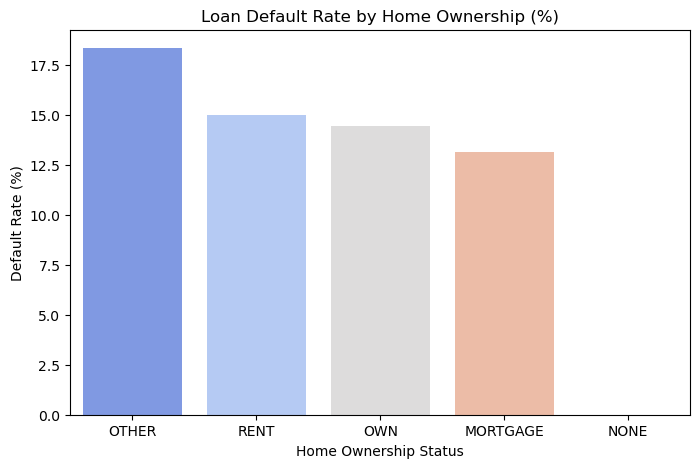

In [38]:
print(rawData.home_ownership.value_counts())
print(rawData.home_ownership.isnull().sum())
aggregated_data = rawData.groupby("home_ownership").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

aggregated_data

# Sort home ownership categories by default rate
aggregated_data_sorted = aggregated_data.sort_values(by="default_rate", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")
plt.xlabel("Home Ownership Status")
plt.ylabel("Default Rate (%)")
plt.title("Loan Default Rate by Home Ownership (%)")
plt.show()

We can conclude that the home ownership does not have any impact non default rate

### Impact of Borrower's varification status on loan default

In [254]:
print(rawData.verification_status.value_counts())
print(rawData.verification_status.isnull().sum())

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64
0


C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\2176347688.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")


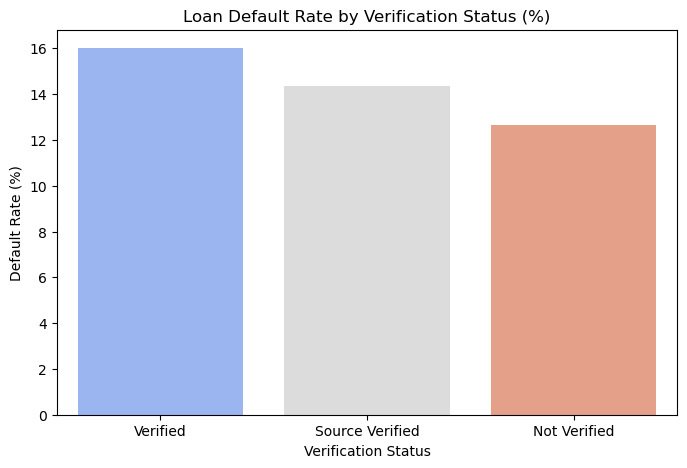

In [39]:
aggregated_data = rawData.groupby("verification_status").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100
aggregated_data

# Sort verification statuses by default rate
aggregated_data_sorted = aggregated_data.sort_values(by="default_rate", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=aggregated_data_sorted.index, y=aggregated_data_sorted["default_rate"], palette="coolwarm")
plt.xlabel("Verification Status")
plt.ylabel("Default Rate (%)")
plt.title("Loan Default Rate by Verification Status (%)")
plt.show()

- We can conclude that the varification status does not have any impact non default rate, it is higher on verified borrowers therefore we can conclude that the varification status can not be considered for our analysis. It does not signify that we should not do the varification

### Impact of Borrower's employer on loan default

In [256]:
print(rawData.emp_title.isnull().sum())
print(rawData.emp_title.value_counts())

2459
emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64


In [257]:
# Convert 'emp_title' to categorical type
rawData["emp_title"] = rawData["emp_title"].astype("category")

# Compute value counts
value_counts = rawData["emp_title"].value_counts(sort=False)

# Identify titles with less than 5 occurrences
titles_to_replace = set(value_counts[value_counts < 5].index)

# ✅ Step 1: Explicitly add "Others" to the categories before modification
rawData["emp_title"] = rawData["emp_title"].cat.add_categories(["Others"])

# ✅ Step 2: Use .loc[] to replace small categories with "Others"
rawData.loc[rawData["emp_title"].isin(titles_to_replace), "emp_title"] = "Others"

# ✅ Step 3: Remove unused categories after replacement
rawData["emp_title"] = rawData["emp_title"].cat.remove_unused_categories()

# Perform aggregation
aggregated_data = rawData.groupby("emp_title", observed=True).agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)

# Compute default rate
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]).mul(100)

# Display the final aggregated data
aggregated_data

total_loans  default_loans  default_rate
emp_title                                                 
3M                          7              0      0.000000
ACS                         6              0      0.000000
ADP                        17              3     17.647059
AIG                         9              1     11.111111
AT and T                    7              1     14.285714
...                       ...            ...           ...
walgreens                  15              5     33.333333
walmart                    25              4     16.000000
wells fargo                10              3     30.000000
wells fargo bank            8              1     12.500000
Others                  32037           4507     14.068109

[449 rows x 3 columns]

- Many employers has 0 default rate, meaning it is safe to lend the money to employees of these companies 
- Accenture, PWC has 0 default rate where as companies like ups has highest 60% default rate 

### Unused columns 
1. Remove funded_amnt_inv 
- we already have funded_amnt their stats is also similar, 
- we are not analyzing the invester side of the aspacts 
2. remove policy_code
- It does not make any sense 
3. remove payment plan
- it has all unique values
4. Home ownership
- It also does not have any impact on default 
5. Varification status
- It does not have any impact on default

In [258]:
# rawData= rawData.drop(columns=['last_credit_pull_d','issue_d_year','issue_d_month','title','application_type','issue_d','initial_list_status','last_pymnt_d','earliest_cr_line'])
rawData= rawData.drop(columns=['funded_amnt_inv','sub_grade','home_ownership','addr_state','verification_status','zip_code'])

### Impact of employment length on Loan Status 

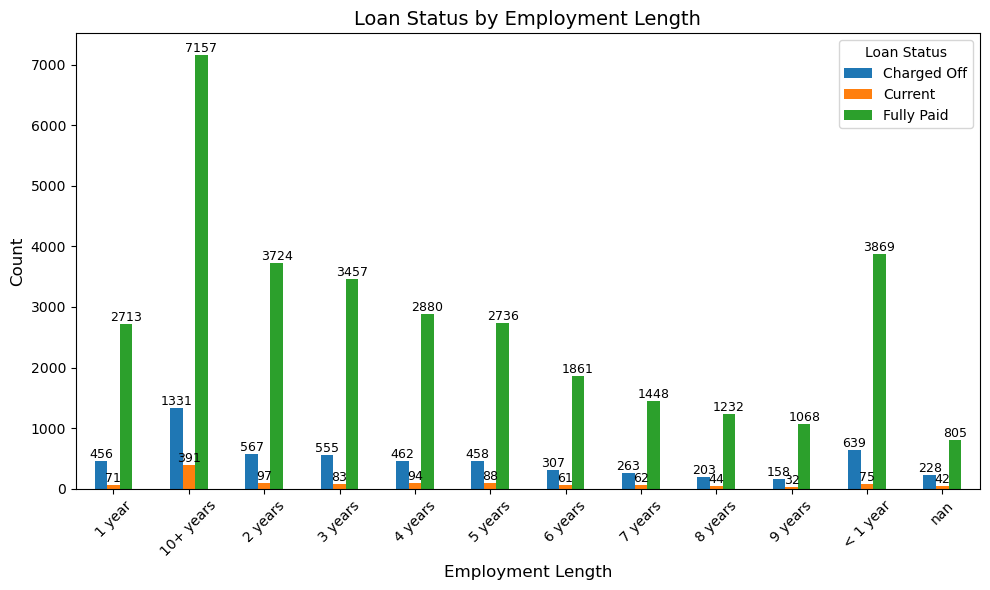

loan_status  Charged Off  Current  Fully Paid
emp_length                                   
1 year               456       71        2713
10+ years           1331      391        7157
2 years              567       97        3724
3 years              555       83        3457
4 years              462       94        2880
5 years              458       88        2736
6 years              307       61        1861
7 years              263       62        1448
8 years              203       44        1232
9 years              158       32        1068
< 1 year             639       75        3869
nan                  228       42         805

In [259]:
grouped_data = rawData.groupby(["emp_length", "loan_status"], observed=False).size().unstack(fill_value=0)

# Plotting
ax = grouped_data.plot(kind="bar", stacked=False, figsize=(10, 6), color=["#1f77b4", "#ff7f0e", "#2ca02c"])

# Adding labels and title
plt.title("Loan Status by Employment Length", fontsize=14)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loan Status", fontsize=10)
plt.tight_layout()

# Adding annotations
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate if the height is greater than 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9,
            )

# Show the plot
plt.show()

grouped_data

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\1081795804.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data_sorted.index.astype(str), y=grouped_data_sorted["default_rate"], palette="coolwarm")


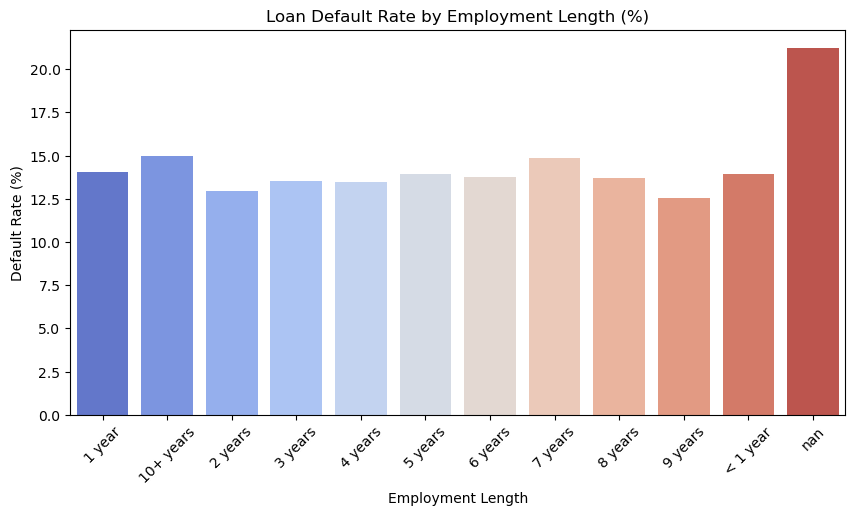

In [41]:
grouped_data = rawData.groupby(["emp_length", "loan_status"], observed=False).size().unstack(fill_value=0)

grouped_data["default_rate"] = (grouped_data.get("Charged Off", 0) / grouped_data.sum(axis=1)) * 100

# Sort by employment length
grouped_data_sorted = grouped_data.sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=grouped_data_sorted.index.astype(str), y=grouped_data_sorted["default_rate"], palette="coolwarm")
plt.xlabel("Employment Length")
plt.ylabel("Default Rate (%)")
plt.title("Loan Default Rate by Employment Length (%)")
plt.xticks(rotation=45)
plt.show()

### Impact of employment length on Loan Status based on %

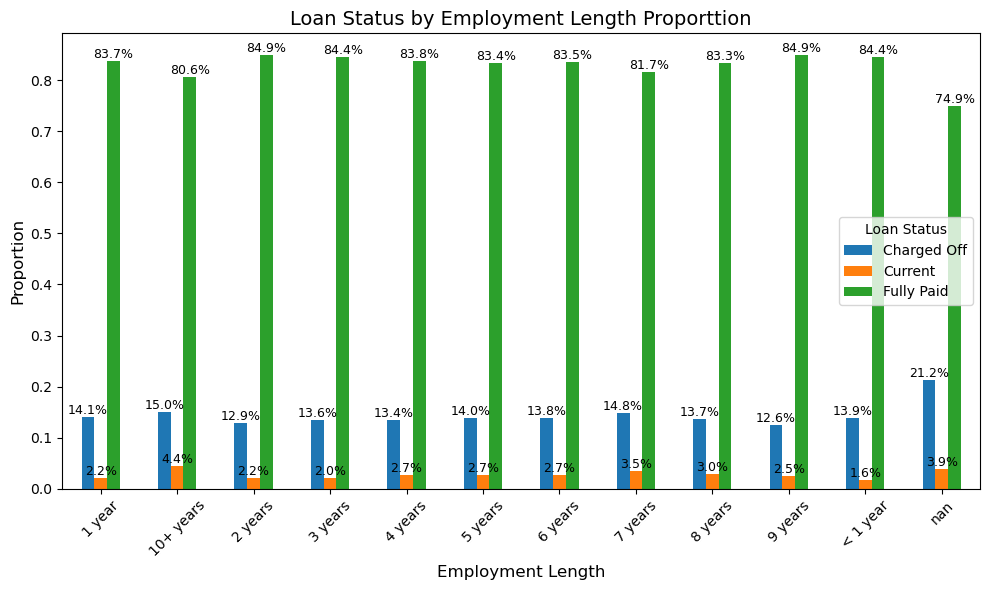

In [260]:
# Calculate total for each emp_length
grouped_data['Total'] = grouped_data.sum(axis=1)

# Calculate proportions
proportions_df = grouped_data.iloc[:, :-1].div(grouped_data['Total'], axis=0)

# Plotting
ax = proportions_df.plot(kind="bar", stacked=False, figsize=(10, 6), color=["#1f77b4", "#ff7f0e", "#2ca02c"])

# Adding labels and title
plt.title("Loan Status by Employment Length Proporttion", fontsize=14)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loan Status", fontsize=10)
plt.tight_layout()

# Adding annotations
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate if the height is greater than 0
            ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height,  # Add a small offset to the y-coordinate
            f"{height:.1%}", 
            ha="center", 
            va="bottom", 
            fontsize=9
        )

# Show the plot
plt.show()

#### Few Key take aways from these charts 
- All the employments length has the default 
- The higest loans were given to 10+ years exprience individuals. This categoty also has default in the similar propotions
- The lowest loans were given to business class, Their fraction of default is also high compare to others 

### Impact of loan default on income range 

In [261]:
print("----------Funded Amount--------")
print(rawData.funded_amnt.dtype)
print(rawData.funded_amnt.describe().to_frame())
print("----------Annual Salary--------")
print(rawData.annual_inc.dtype)
print(rawData.annual_inc.describe().to_frame())

----------Funded Amount--------
int64
        funded_amnt
count  39717.000000
mean   10947.713196
std     7187.238670
min      500.000000
25%     5400.000000
50%     9600.000000
75%    15000.000000
max    35000.000000
----------Annual Salary--------
float64
         annual_inc
count  3.971700e+04
mean   6.896893e+04
std    6.379377e+04
min    4.000000e+03
25%    4.040400e+04
50%    5.900000e+04
75%    8.230000e+04
max    6.000000e+06


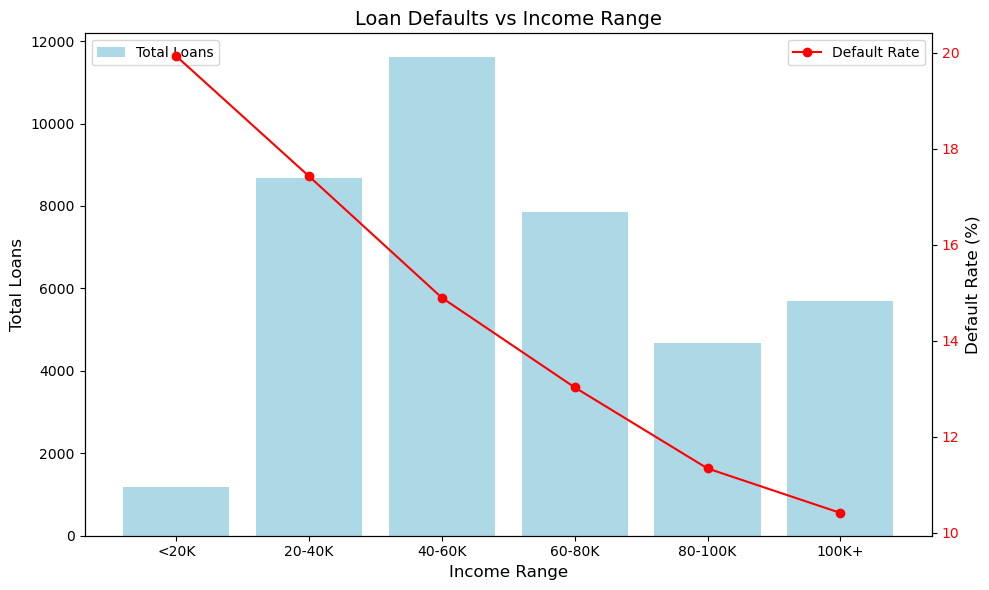

In [262]:
# Define income bins (modify based on your dataset)
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ["<20K", "20-40K", "40-60K", "60-80K", "80-100K", "100K+"]

# Bin the income data
rawData["income_range"] = pd.cut(rawData["annual_inc"], bins=income_bins, labels=income_labels)


# Aggregate data
aggregated_data = rawData.groupby("income_range",observed=True).agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total loans
ax1.bar(aggregated_data.index, aggregated_data["total_loans"], color="lightblue", label="Total Loans")
ax1.set_ylabel("Total Loans", fontsize=12)
ax1.set_xlabel("Income Range", fontsize=12)
ax1.tick_params(axis="y")
ax1.legend(loc="upper left", fontsize=10)

# Line plot for default rates
ax2 = ax1.twinx()
ax2.plot(aggregated_data.index, aggregated_data["default_rate"], color="red", marker="o", label="Default Rate")
ax2.set_ylabel("Default Rate (%)", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right", fontsize=10)

# Title and layout
plt.title("Loan Defaults vs Income Range", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Impact of loan default on Funded Amount range

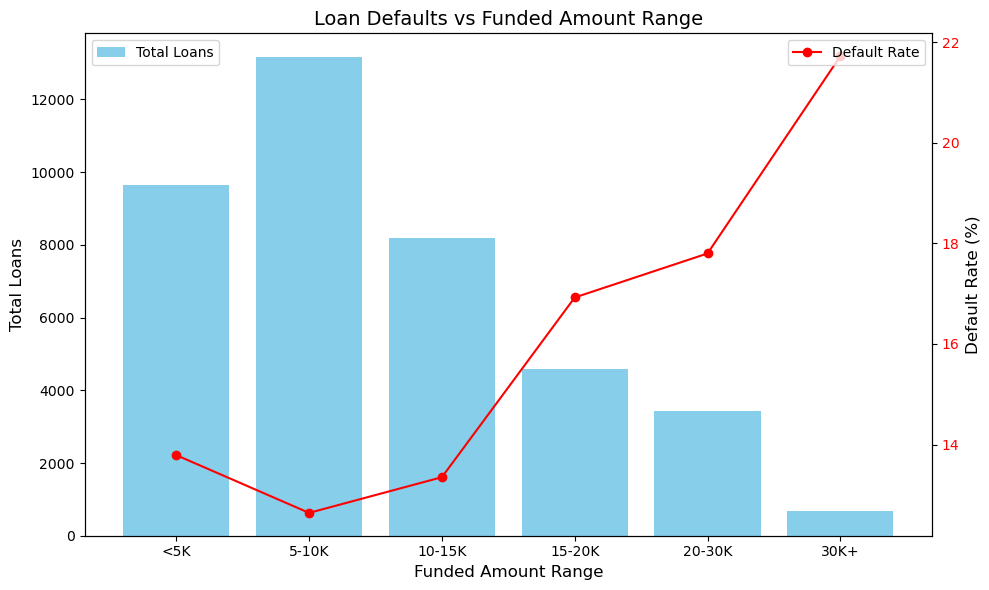

In [263]:
# Define funded amount bins
funded_bins = [0, 5000, 10000, 15000, 20000, 30000, float('inf')]
funded_labels = ["<5K", "5-10K", "10-15K", "15-20K", "20-30K", "30K+"]

# Bin the funded amount data
rawData["funded_range"] = pd.cut(rawData["funded_amnt"], bins=funded_bins, labels=funded_labels)

# Aggregate data
aggregated_data = rawData.groupby("funded_range",observed=True).agg(
    total_loans=("funded_amnt", "count"),
    default_loans=("is_default", "sum"),
)
aggregated_data["default_rate"] = (aggregated_data["default_loans"] / aggregated_data["total_loans"]) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total loans
ax1.bar(aggregated_data.index, aggregated_data["total_loans"], color="skyblue", label="Total Loans")
ax1.set_ylabel("Total Loans", fontsize=12)
ax1.set_xlabel("Funded Amount Range", fontsize=12)
ax1.tick_params(axis="y")
ax1.legend(loc="upper left", fontsize=10)

# Line plot for default rate
ax2 = ax1.twinx()
ax2.plot(aggregated_data.index, aggregated_data["default_rate"], color="red", marker="o", label="Default Rate")
ax2.set_ylabel("Default Rate (%)", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right", fontsize=10)

# Title and layout
plt.title("Loan Defaults vs Funded Amount Range", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_12176\4076163956.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_term_data.index, y=grouped_term_data["default_rate"], palette="coolwarm")


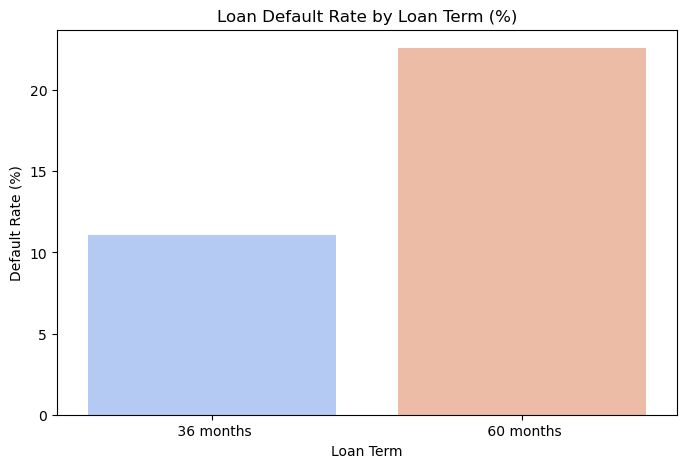

In [42]:
# Group by loan term and calculate default rate
grouped_term_data = rawData.groupby("term").agg(
    total_loans=("loan_amnt", "count"),
    default_loans=("is_default", "sum"),
)
grouped_term_data["default_rate"] = (grouped_term_data["default_loans"] / grouped_term_data["total_loans"]) * 100

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped_term_data.index, y=grouped_term_data["default_rate"], palette="coolwarm")
plt.xlabel("Loan Term")
plt.ylabel("Default Rate (%)")
plt.title("Loan Default Rate by Loan Term (%)")
plt.show()

## 7. Multivariate Analysis

### Default Rate by Income Range and Funded Amount Range

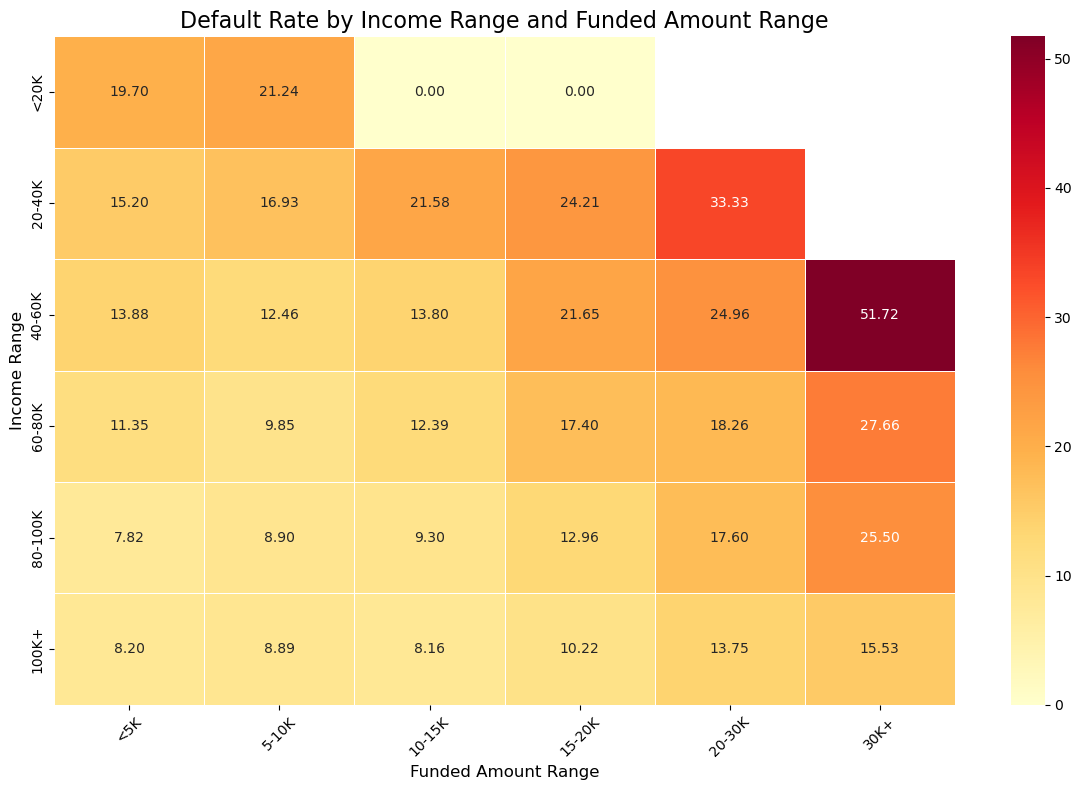

In [264]:
# Group by income_range and funded_range, and calculate default rate
grouped_data = rawData.groupby(["income_range", "funded_range"], observed=False).agg(
    total_loans=("funded_amnt", "count"),
    default_loans=("is_default", "sum"),
)
grouped_data["default_rate"] = (grouped_data["default_loans"] / grouped_data["total_loans"]) * 100

# Reset index for visualization
grouped_data = grouped_data.reset_index()

# Pivot for heatmap
heatmap_data = grouped_data.pivot(index="income_range", columns="funded_range", values="default_rate")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
plt.title("Default Rate by Income Range and Funded Amount Range", fontsize=16)
plt.xlabel("Funded Amount Range", fontsize=12)
plt.ylabel("Income Range", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Few Key take aways from these charts 
- Risk is higher for the low income borrowers taking on large loans
- Higher income borrowers are likely to default regardless of loan amount, However the risk increases when the funded amount is higher 
- As the funded amount increases the default rate increases 
- From Bar chart, The income range 40-60 got higher number of loans, you can also see in heatmap they have the highest default rates for higher amount of loans

In [265]:
print(rawData.columns[rawData.dtypes != object])
print(rawData.columns[rawData.dtypes == object])

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'emp_title',
       'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'is_default', 'issue_d_year', 'issue_d_month', 'income_range',
       'funded_range'],
      dtype='object')
Index(['term', 'grade', 'emp_length', 'loan_status', 'purpose', 'title'], dtype='object')


### Default Rate by Interest Range and term

interest_range
10-12%    8576
12-14%    7469
6-8%      6885
+16%      5869
14-16%    5410
8-10%     4160
<6%       1348
Name: count, dtype: int64


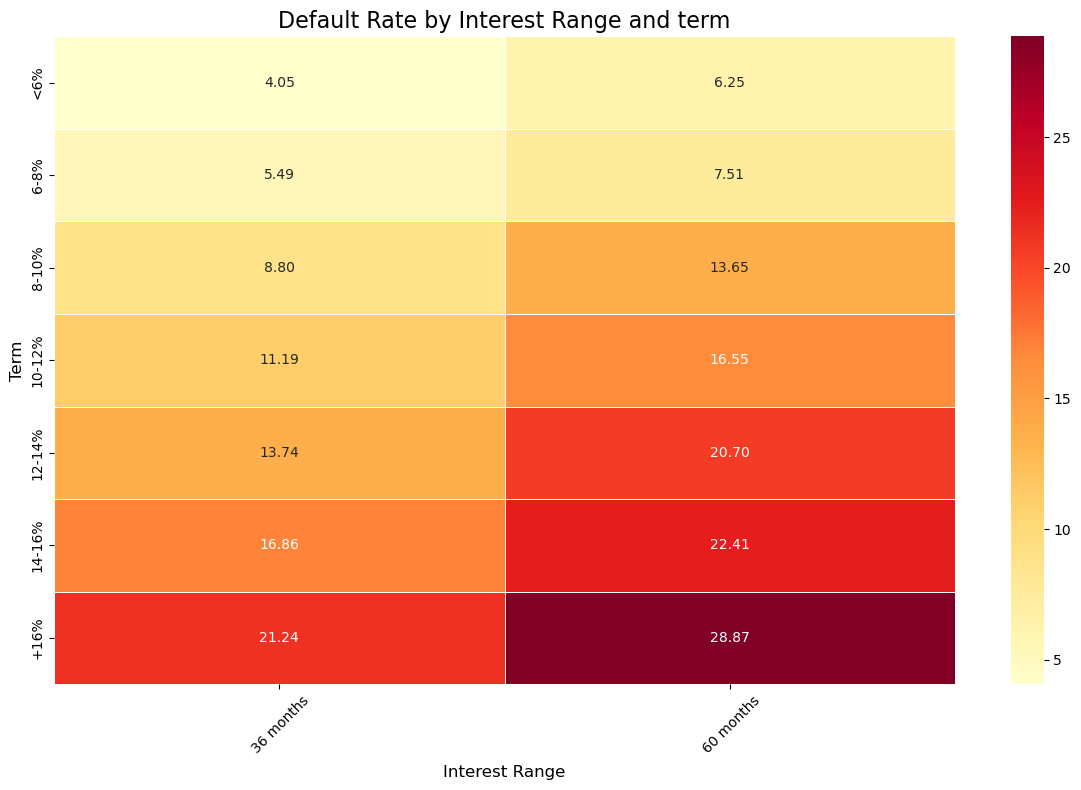

In [266]:
# Define interest bins
interest_bins = [0, 6, 8, 10, 12, 14, 16, float('inf')]
interest_labels = ["<6%", "6-8%", "8-10%", "10-12%", "12-14%","14-16%", "+16%"]

rawData["interest_range"] = pd.cut(rawData["int_rate"], bins=interest_bins, labels=interest_labels)
print(rawData.interest_range.value_counts())
grouped_data = rawData.groupby(["interest_range", "term"], observed=False).agg(
    total_loans=("funded_amnt", "count"),
    default_loans=("is_default", "sum"),
)
grouped_data["default_rate"] = (grouped_data["default_loans"] / grouped_data["total_loans"]) * 100

# Reset index for visualization
grouped_data = grouped_data.reset_index()

# Pivot for heatmap
heatmap_data = grouped_data.pivot(index="interest_range", columns="term", values="default_rate")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
plt.title("Default Rate by Interest Range and term", fontsize=16)
plt.xlabel("Interest Range", fontsize=12)
plt.ylabel("Term", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Few Key take aways from these charts
- Higher interest rates has higher default rate 
- Lower interest rates has low defeult rate 
- Higher term has higher chance of default

### Default Rate by Installment and Bankruptcy Ranges

In [267]:
rawData['pub_rec_bankruptcies'] = pd.Categorical(rawData.pub_rec_bankruptcies.fillna('Not Known'))
print(rawData['pub_rec_bankruptcies'].value_counts())
print(rawData['pub_rec_bankruptcies'].dtype)

pub_rec_bankruptcies
0.0          37339
1.0           1674
Not Known      697
2.0              7
Name: count, dtype: int64
category


installment_range
200-400     15171
0-200       13281
400-600      6875
600-800      2772
800-1000     1383
1000+         235
Name: count, dtype: int64


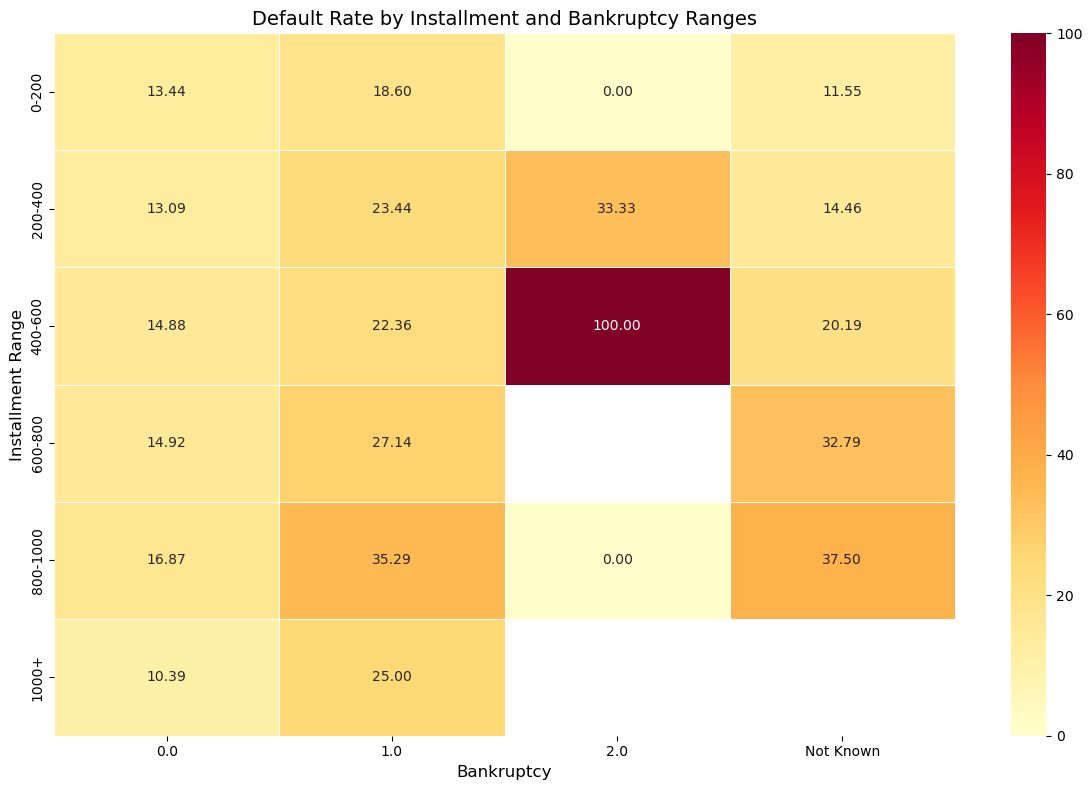

In [268]:
# Define bins and labels for installments
installment_bins = [0, 200, 400, 600, 800, 1000, float('inf')]
installment_labels = ["0-200", "200-400", "400-600", "600-800", "800-1000", "1000+"]

# Create a new column for installment bins
rawData['installment_range'] = pd.cut(rawData['installment'], bins=installment_bins, labels=installment_labels)

# Check distribution of installment ranges
print(rawData['installment_range'].value_counts())


grouped_data = rawData.groupby(["installment_range", "pub_rec_bankruptcies"], observed=False).agg(
    total_loans=("funded_amnt", "count"),
    default_loans=("is_default", "sum"),
)
grouped_data["default_rate"] = (grouped_data["default_loans"] / grouped_data["total_loans"]) * 100

# Reset index for visualization
grouped_data = grouped_data.reset_index()



# Pivot for heatmap
heatmap_data = grouped_data.pivot(index="installment_range", columns="pub_rec_bankruptcies", values="default_rate")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
# Plot the heatmap
plt.title("Default Rate by Installment and Bankruptcy Ranges", fontsize=14)
plt.xlabel("Bankruptcy", fontsize=12)
plt.ylabel("Installment Range", fontsize=12)
plt.tight_layout()
plt.show()

- Borrowers with a history of bankruptcy (especially 1 or more) are significantly more likely to default, especially in mid-to-high installment ranges.
- Higher installments correlate with higher default rates, but the trend flattens or decreases slightly beyond the 1500+ range, possibly due to a smaller, financially stronger borrower population.

### Default Rate by Installment and Income Ranges

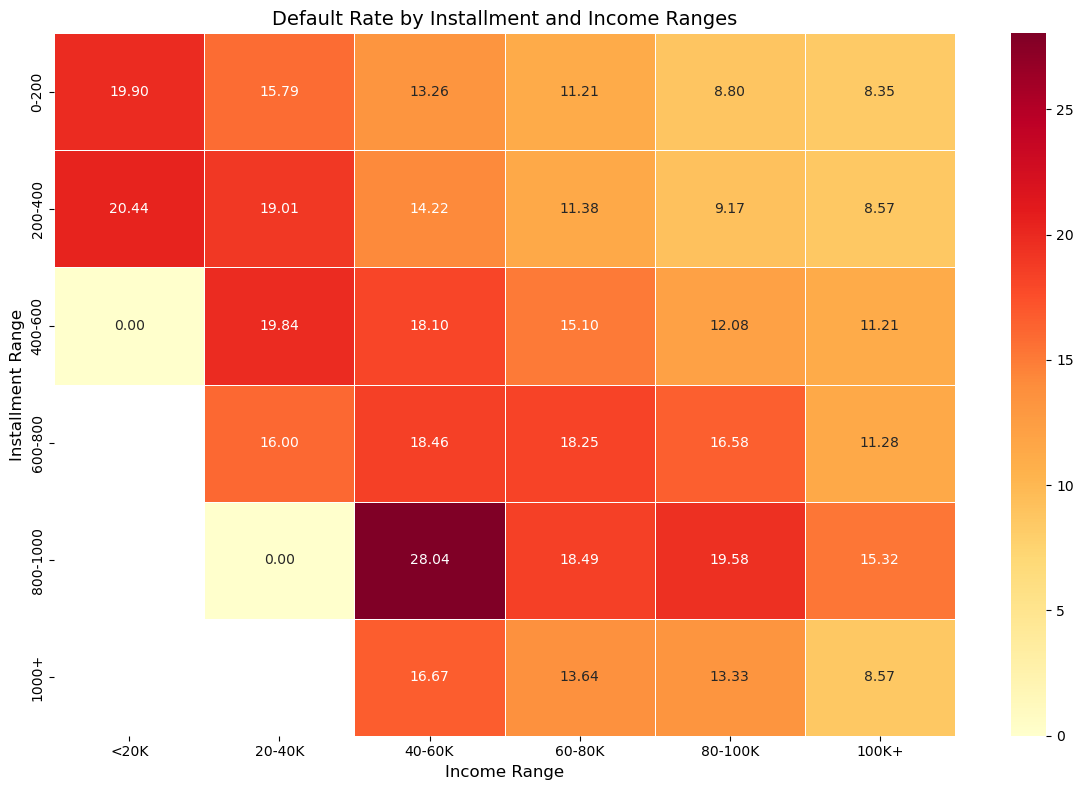

In [269]:
grouped_data = rawData.groupby(["installment_range", "income_range"], observed=False).agg(
    total_loans=("funded_amnt", "count"),
    default_loans=("is_default", "sum"),
)
grouped_data["default_rate"] = (grouped_data["default_loans"] / grouped_data["total_loans"]) * 100

# Reset index for visualization
grouped_data = grouped_data.reset_index()



# Pivot for heatmap
heatmap_data = grouped_data.pivot(index="installment_range", columns="income_range", values="default_rate")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
# Plot the heatmap
plt.title("Default Rate by Installment and Income Ranges", fontsize=14)
plt.xlabel("Income Range", fontsize=12)
plt.ylabel("Installment Range", fontsize=12)
plt.tight_layout()
plt.show()

#### Key take aways
- Income Stability: Higher income reduces default risk, even with higher installments.
- Installment Threshold: Installments between 800-1000 pose the highest default risk across income ranges, especially for low-to-middle-income groups.
- Low-Income Borrowers: Those earning less than 40K have a disproportionately higher risk of default across all installment brackets.

### Default Rate by DTI Range and Open Account Range

In [270]:
# Define bins and labels for open_acc
open_acc_bins = [0, 5, 10, 15, 20, 25, float('inf')]
open_acc_labels = ["0-5", "6-10", "11-15", "16-20", "21-25", "26+"]

# Define bins and labels for total_acc
total_acc_bins = [0, 20, 40, 60, 80, float('inf')]
total_acc_labels = ["0-20", "21-40", "41-60", "61-80", "80+"]

# Add binned columns to the DataFrame
rawData['open_acc_range'] = pd.cut(rawData['open_acc'], bins=open_acc_bins, labels=open_acc_labels, right=False)
rawData['total_acc_range'] = pd.cut(rawData['total_acc'], bins=total_acc_bins, labels=total_acc_labels, right=False)
dti_bins = [0, 10, 20, float('inf')]
dti_labels = ["0-10", "10-20", "20+"]

# Create binned columns
rawData['dti_range'] = pd.cut(rawData['dti'], bins=dti_bins, labels=dti_labels, right=False)
print(rawData['dti_range'].value_counts())

print(rawData.open_acc_range.value_counts())
print(rawData.total_acc_range.value_counts())


dti_range
10-20    19001
0-10     13202
20+       7514
Name: count, dtype: int64
open_acc_range
6-10     18801
11-15    11640
0-5       4441
16-20     3787
21-25      854
26+        194
Name: count, dtype: int64
total_acc_range
0-20     18534
21-40    18074
41-60     2871
61-80      234
80+          4
Name: count, dtype: int64


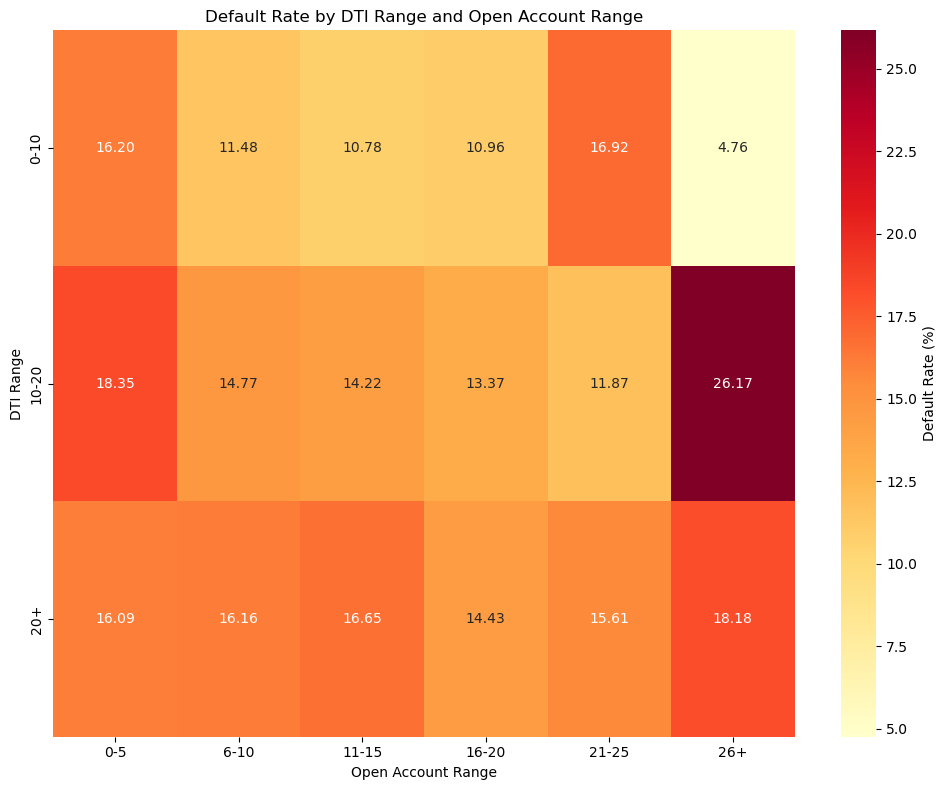

In [271]:

grouped_data = rawData.groupby(["dti_range", "open_acc_range"], observed=False).agg(
    total_loans=("funded_amnt", "count"),
    default_loans=("is_default", "sum"),
)
grouped_data["default_rate"] = (grouped_data["default_loans"] / grouped_data["total_loans"]) * 100

# Reset index for visualization
grouped_data = grouped_data.reset_index()

# Pivot for heatmap
heatmap_data = grouped_data.pivot(index="dti_range", columns="open_acc_range", values="default_rate")
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,  # Convert to percentage for better interpretation
    annot=True, fmt=".2f", cmap="YlOrRd",
    cbar_kws={'label': 'Default Rate (%)'}
)
plt.title("Default Rate by DTI Range and Open Account Range")
plt.ylabel("DTI Range")
plt.xlabel("Open Account Range")
plt.tight_layout()
plt.show()

#### This heatmap visualizes how the default rate (i.e., the percentage of loans that were not repaid) varies across different combinations of Debt-to-Income (DTI) Range and Open Account Range.

#### Key Observations:

1. Higher DTI, Higher Default Rate:

- In general, as the DTI range increases (moving down the rows), the default rate tends to increase, indicated by the darker shades of red. This suggests that borrowers with higher debt burdens are more likely to default on their loans.

2. Open Accounts and Default Rate:

- The relationship between the number of open accounts and default rate is more nuanced.
For lower DTI ranges (0-10 and 10-20), the default rate tends to increase slightly as the number of open accounts increases (moving across the columns).

- However, for the highest DTI range (20+), the default rate initially increases and then decreases slightly. This could suggest that having a moderate number of open accounts might be less risky for borrowers with high DTI, potentially due to better credit management.